In [32]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, GLMakie, JLD
GLMakie.activate!()

In [2]:
function sigma(x)
    λ = 10
    θ = -0.25
    return 1.0 / (1.0 + exp(-λ * (x  - θ)))
end
function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chemical_link, electrical_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chemical_link * ( x1 - vs ) * sigma(x2) + electrical_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chemical_link * ( x2 - vs ) * sigma(x1) + electrical_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [129]:
function loop_jac(u, p, t)
    a, b, c, d, s, xr, r,  I, vs, k1, k2, k  = p
    x1, y1, z1, x2, y2, z2 = u

    J = @SMatrix [-3*a*x1^2+2*b*x1-k1*sigma(x2)-k 1 -1 -k1*(x1-vs)*sigma_deri(x2) + k 0 0;
                -2*d*x1 -1 0 0 0 0;
                r*s 0 -r 0 0 0;
                k-k2*(x2-vs)*sigma_deri(x1) 0  0 -3*a*x2^2+2*b*x2-k*sigma(x1)-k 1 -1;
                0 0 0 -2*d*x2 -1 0;
                0 0 0 r*s 0 -r;]
    return J
end

function sigma_deri(x)
    λ = 10
    θ = -0.25
    return (λ * exp( λ*(x - θ) )) / ( exp( λ*(x - θ) ) + 1 )^2
end

sigma_deri (generic function with 1 method)

In [202]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = -0.17
electrical_link = 0.03

u0 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]

p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.17, 0.03]

In [203]:
start_value_chemical = -0.5
finish_value_chemical = 0.5
len = 1000
range_chemical = range(start_value_chemical, finish_value_chemical, length = len  )

index_fix_var = 2
value_fix_var = 0.05
plane = (index_fix_var, value_fix_var)

transient_step = 5000.0
number_points = 1000.0 #  Amount of points to save for each initial condition.

index_change_param = 10

Δt = 0.01

0.01

In [204]:
i = 1
output1 = produce_orbitdiagram(ds, plane, i, index_change_param, range_chemical;
                              tfinal = number_points, Ttr = transient_step, printparams = true,
                              diffeq = (alg = Vern9(), adaptive = false, dt = Δt)
                                );

parameter = -0.5
parameter = -0.498998998998999
parameter = -0.497997997997998
parameter = -0.496996996996997
parameter = -0.495995995995996
parameter = -0.494994994994995
parameter = -0.493993993993994
parameter = -0.492992992992993
parameter = -0.491991991991992
parameter = -0.49099099099099097
parameter = -0.48998998998999
parameter = -0.488988988988989
parameter = -0.487987987987988
parameter = -0.486986986986987
parameter = -0.48598598598598597
parameter = -0.484984984984985
parameter = -0.48398398398398396
parameter = -0.482982982982983
parameter = -0.481981981981982
parameter = -0.48098098098098097
parameter = -0.47997997997998
parameter = -0.47897897897897895
parameter = -0.477977977977978
parameter = -0.476976976976977
parameter = -0.47597597597597596
parameter = -0.474974974974975
parameter = -0.47397397397397395
parameter = -0.47297297297297297
parameter = -0.471971971971972
parameter = -0.47097097097097096
parameter = -0.46996996996997
parameter = -0.46896896896896895
param

In [205]:
i = 4
output2 = produce_orbitdiagram(ds, plane, i, index_change_param, range_chemical;
                              tfinal = number_points, Ttr = transient_step, printparams = true,
                              diffeq = (alg = Vern9(), adaptive = false, dt = Δt)
                                );

parameter = -0.5
parameter = -0.498998998998999
parameter = -0.497997997997998
parameter = -0.496996996996997
parameter = -0.495995995995996
parameter = -0.494994994994995
parameter = -0.493993993993994
parameter = -0.492992992992993
parameter = -0.491991991991992
parameter = -0.49099099099099097
parameter = -0.48998998998999
parameter = -0.488988988988989
parameter = -0.487987987987988
parameter = -0.486986986986987
parameter = -0.48598598598598597
parameter = -0.484984984984985
parameter = -0.48398398398398396
parameter = -0.482982982982983
parameter = -0.481981981981982
parameter = -0.48098098098098097
parameter = -0.47997997997998
parameter = -0.47897897897897895
parameter = -0.477977977977978
parameter = -0.476976976976977
parameter = -0.47597597597597596
parameter = -0.474974974974975
parameter = -0.47397397397397395
parameter = -0.47297297297297297
parameter = -0.471971971971972
parameter = -0.47097097097097096
parameter = -0.46996996996997
parameter = -0.46896896896896895
param

In [207]:
output_summ = output1 + output2;

In [211]:
path = "C:\\Users\\Alex\\Desktop\\saved_files\\"
cd(path)
directory = "el_link_0.03"
path = path * directory
cd(path)

In [212]:
save("output1.jld", "data", output1)
save("output2.jld", "data", output2)
save("output_summ.jld", "data", output_summ)

#### without electrical link

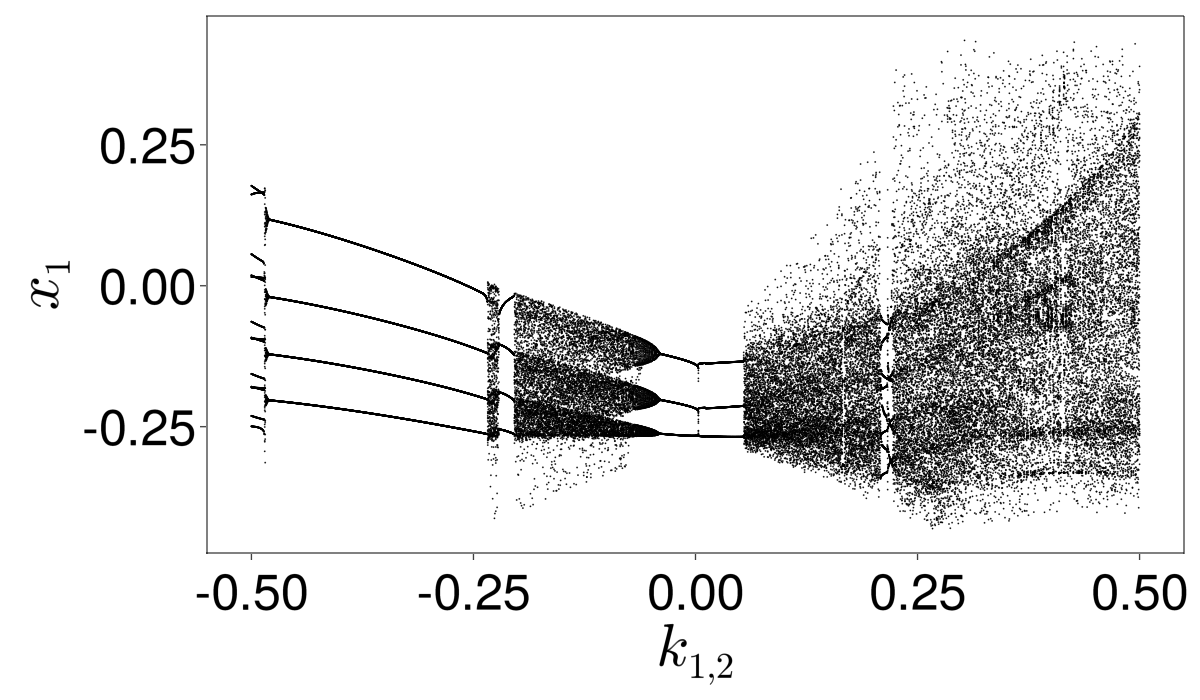

In [162]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig

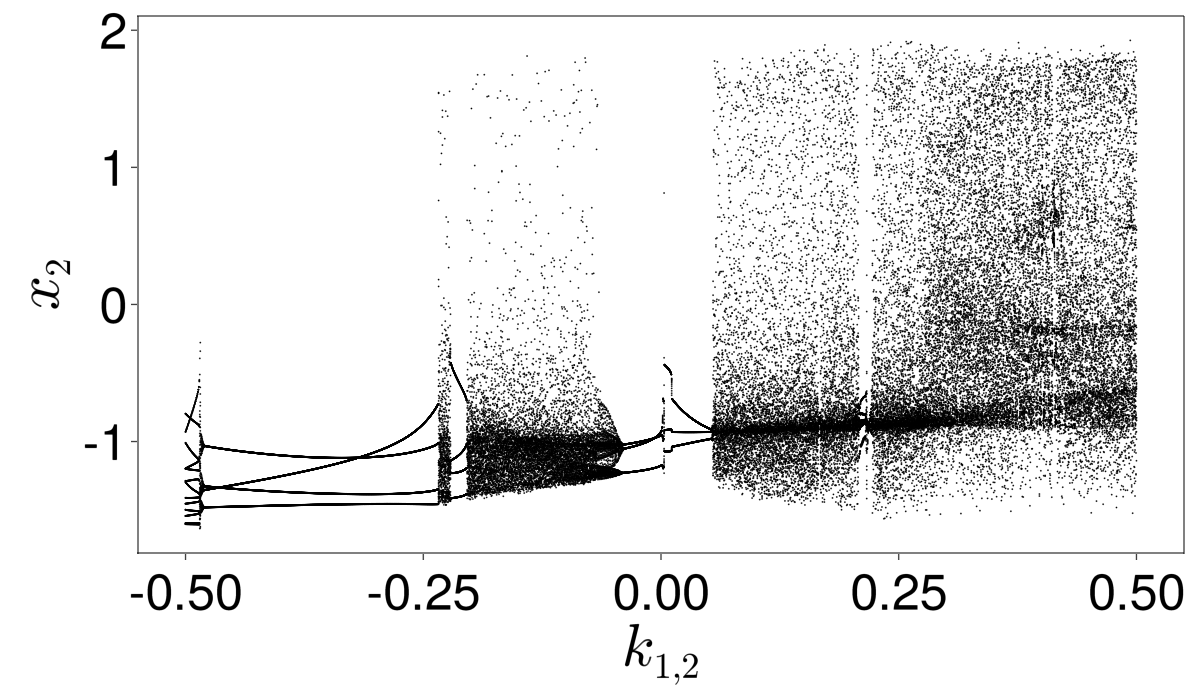

In [127]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{2}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output2[j])), output2[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig

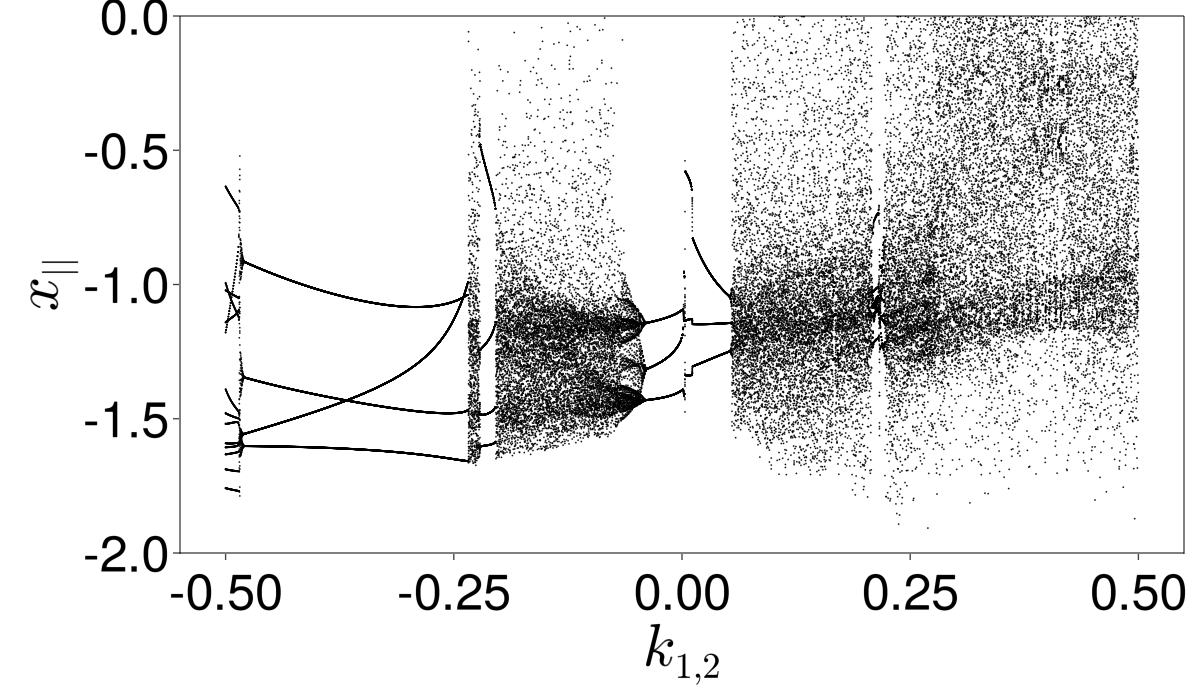

In [163]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks
ylims!(ax, [-2, 0])

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig

#### electrical link 0.02

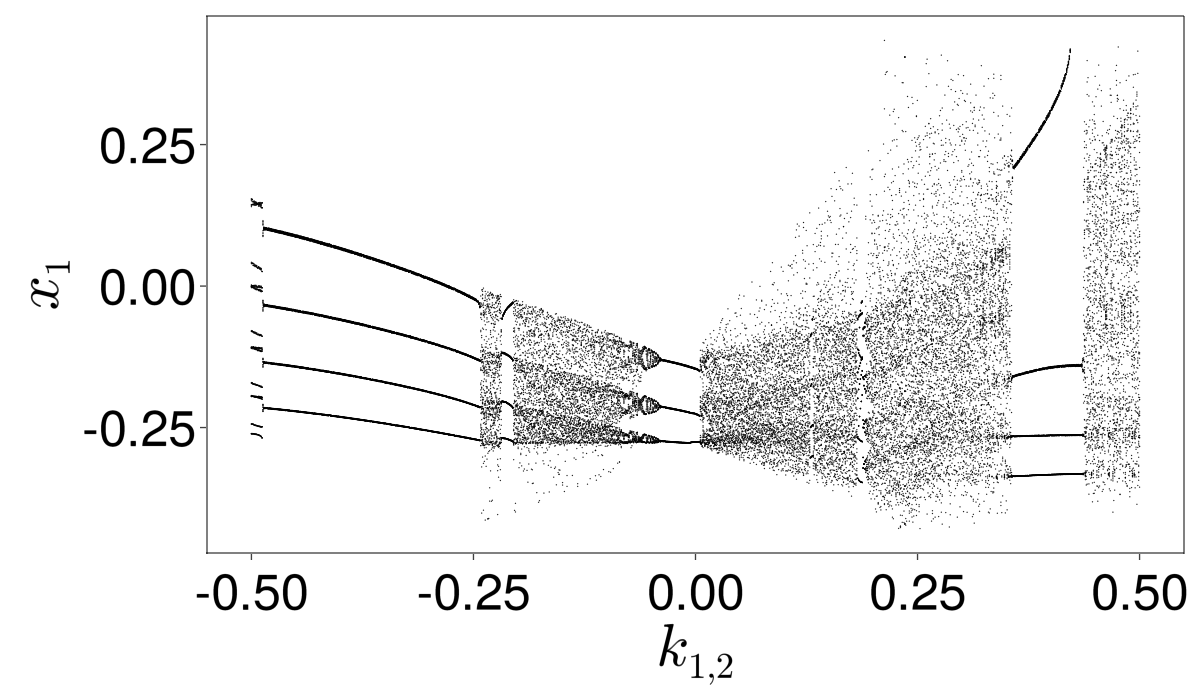

In [193]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("black", 1.0), markersize = 1.0
    )
    
end
fig

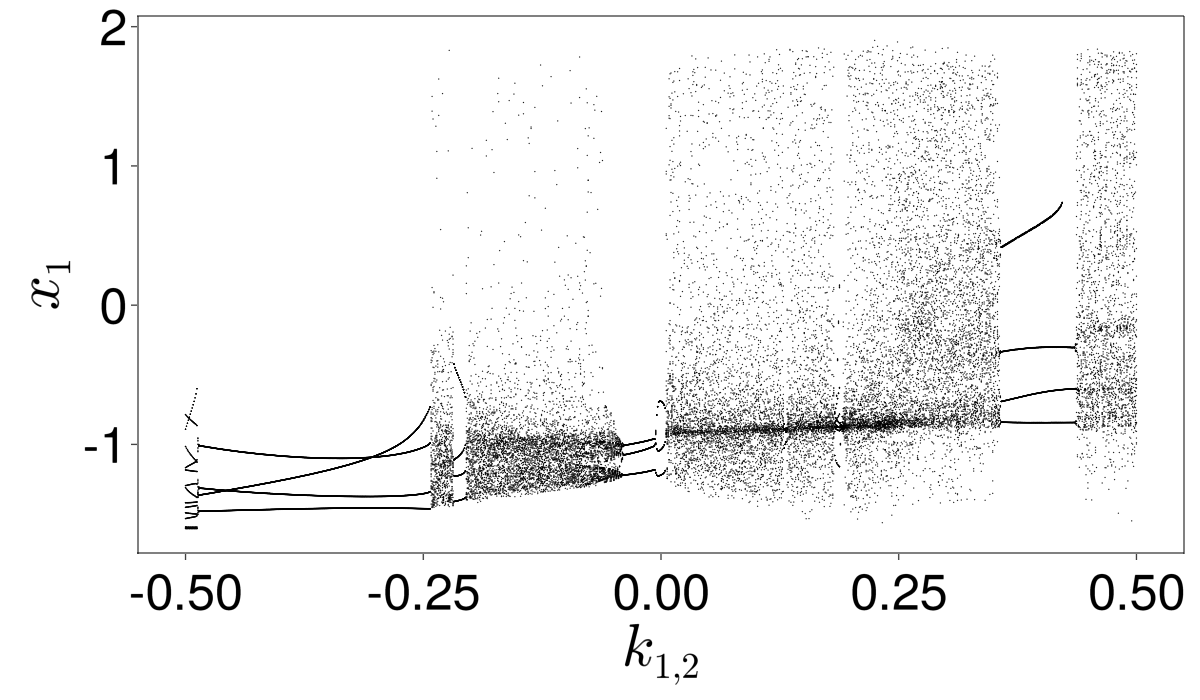

In [194]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output2[j])), output2[j];
        color = ("black", 1.0), markersize = 1.0
    )
    
end
fig

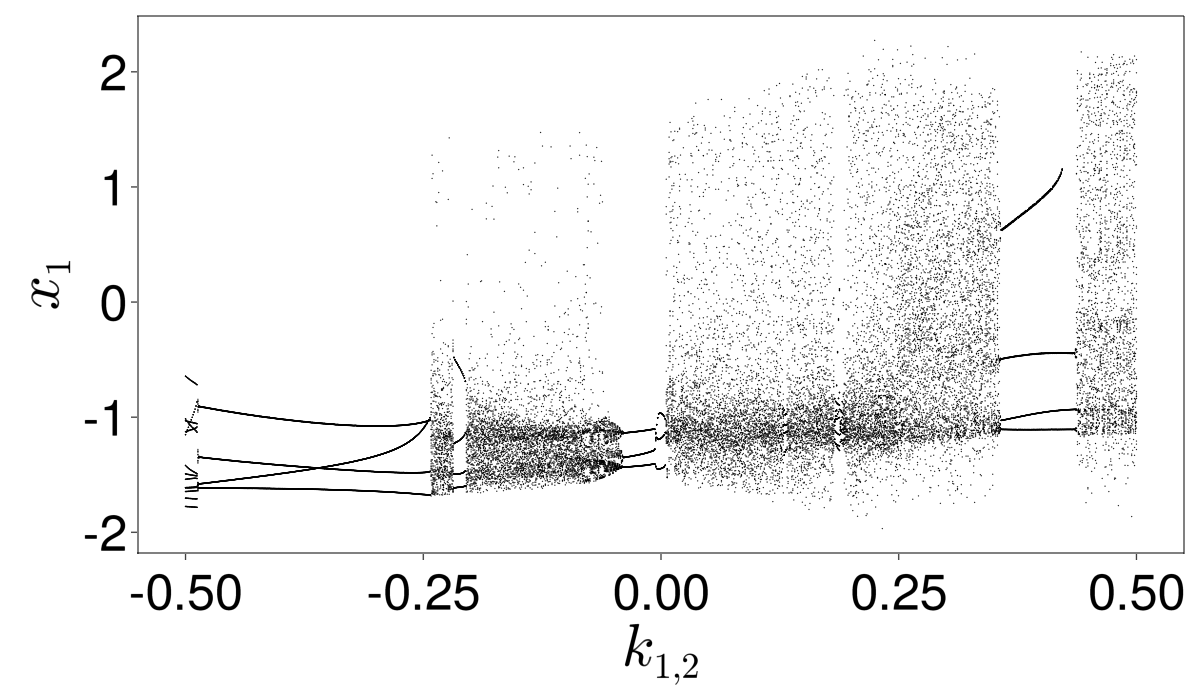

In [195]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 1.0
    )
    
end
fig

#### electrical link 0.03

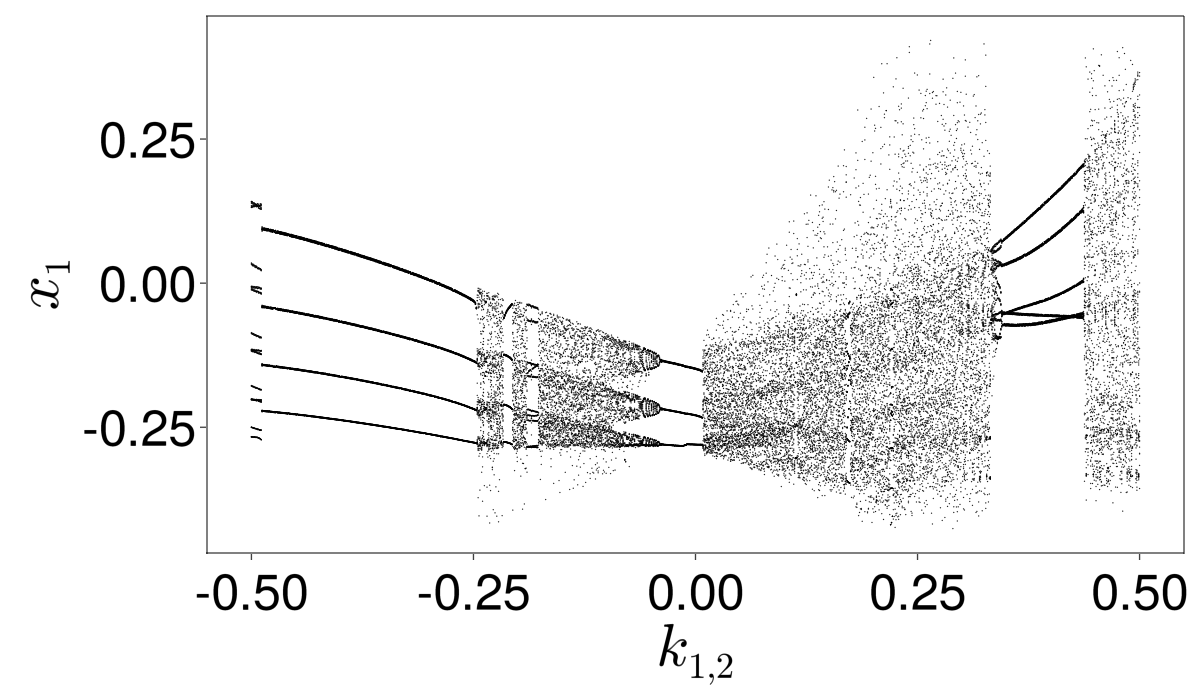

In [213]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("black", 1.0), markersize = 1.0
    )
    
end
fig

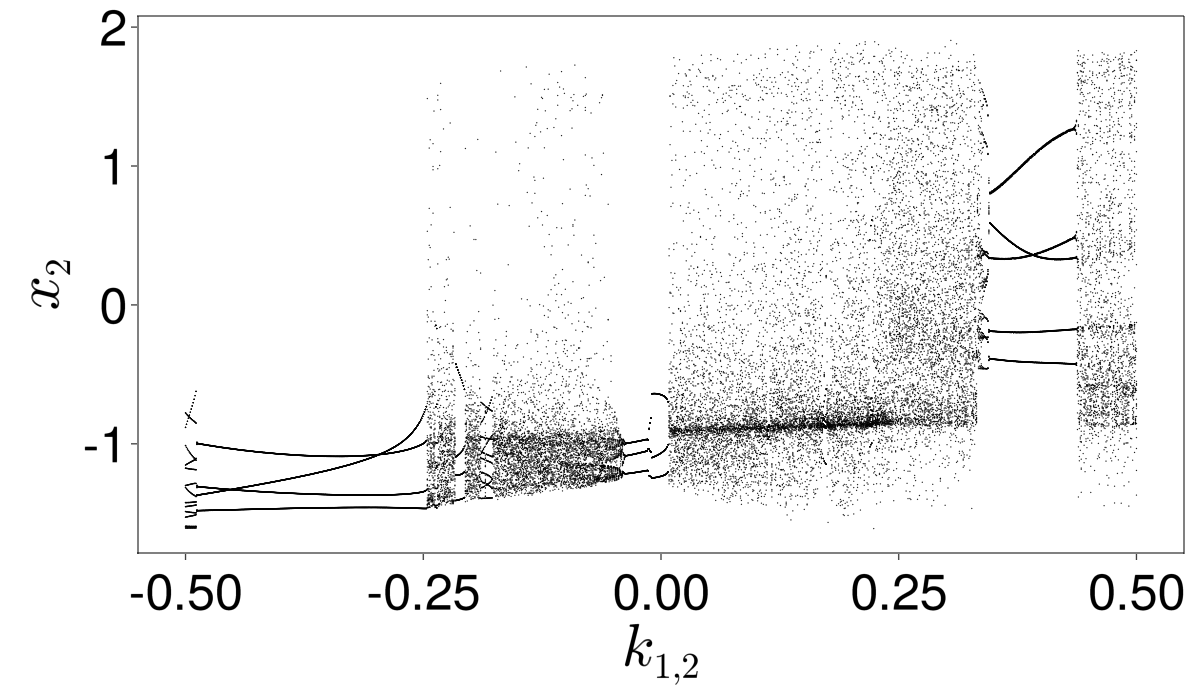

In [214]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{2}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output2[j])), output2[j];
        color = ("black", 1.0), markersize = 1.0
    )
    
end
fig

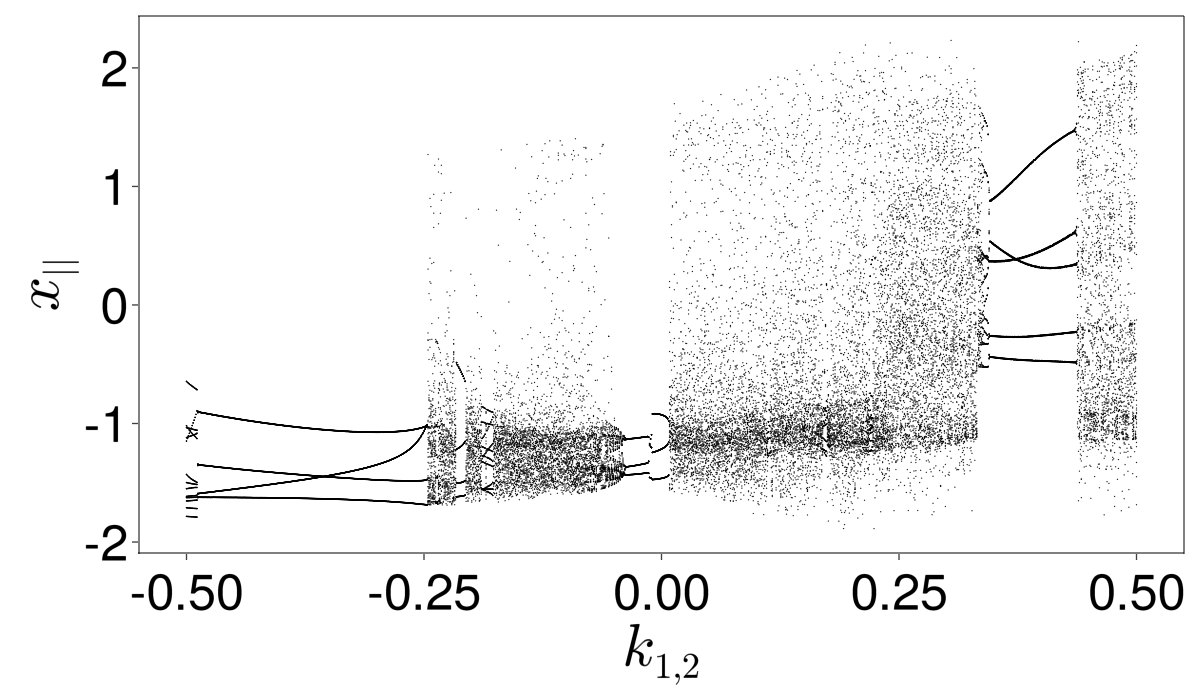

In [215]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 1.0
    )
    
end
fig

#### electrical link 0.04

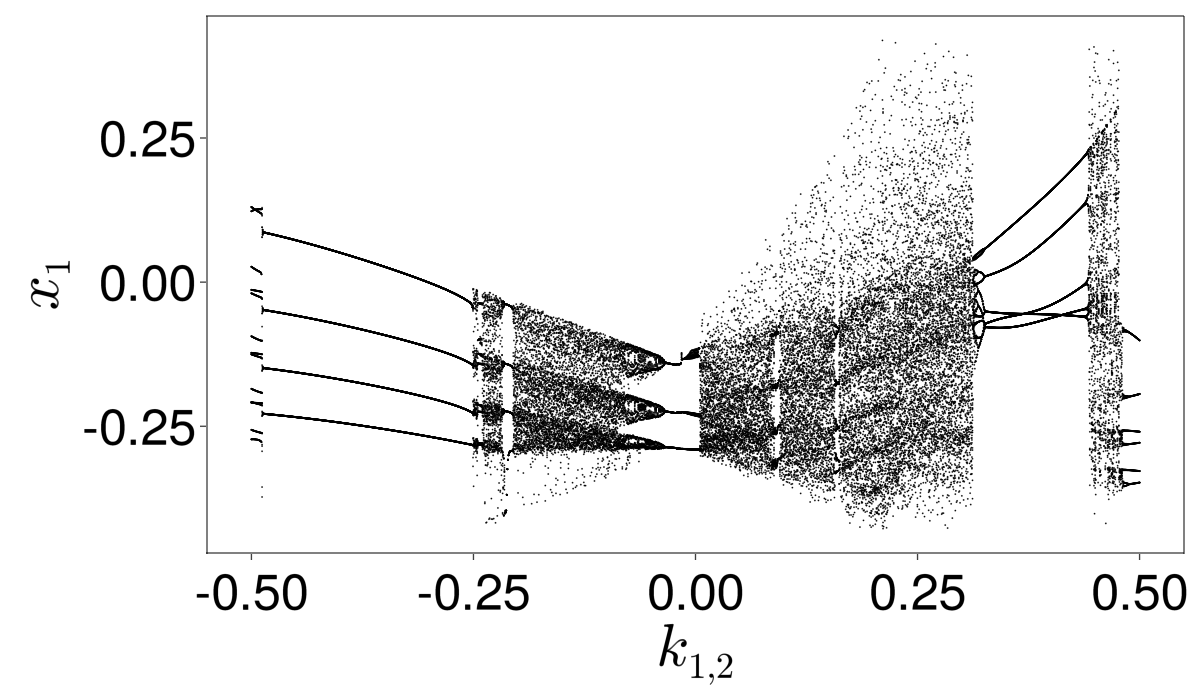

In [92]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig

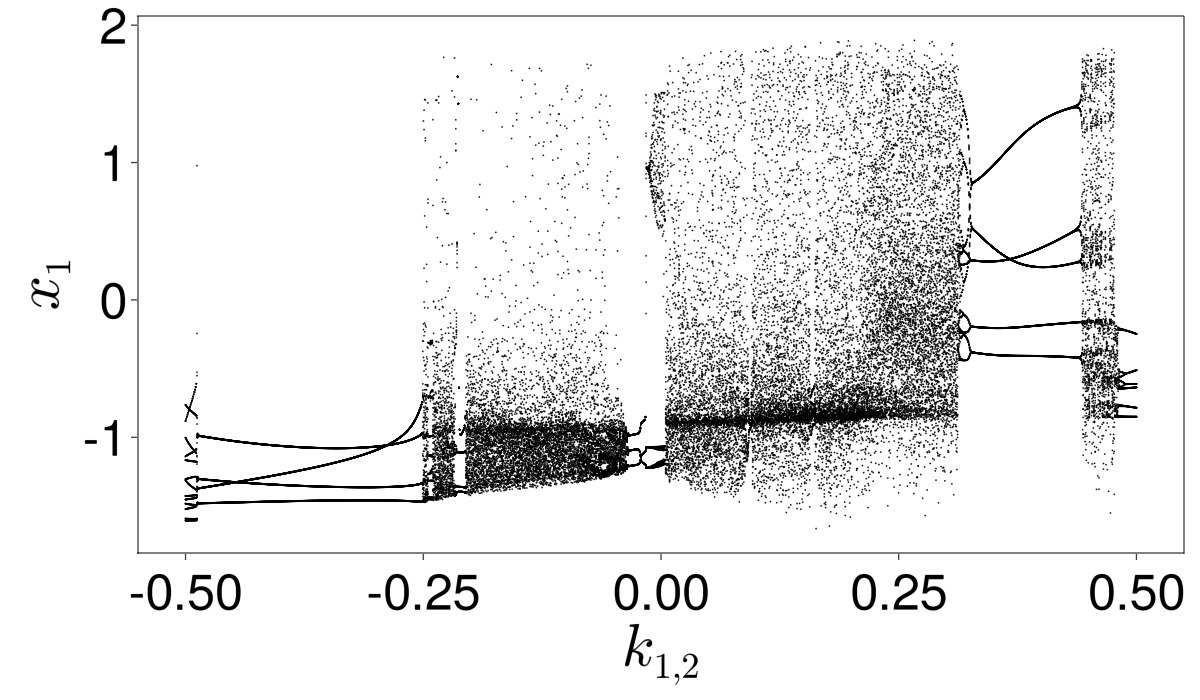

In [93]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{2}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output2[j])), output2[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig

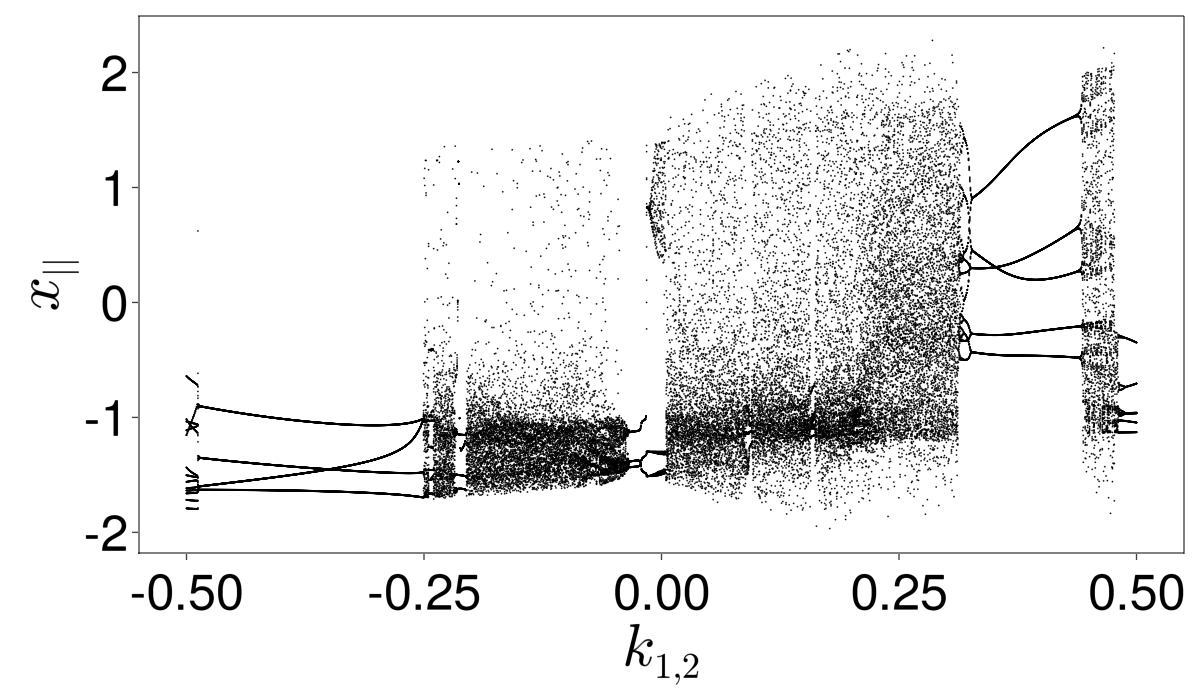

In [94]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig

#### electrical link 0.05

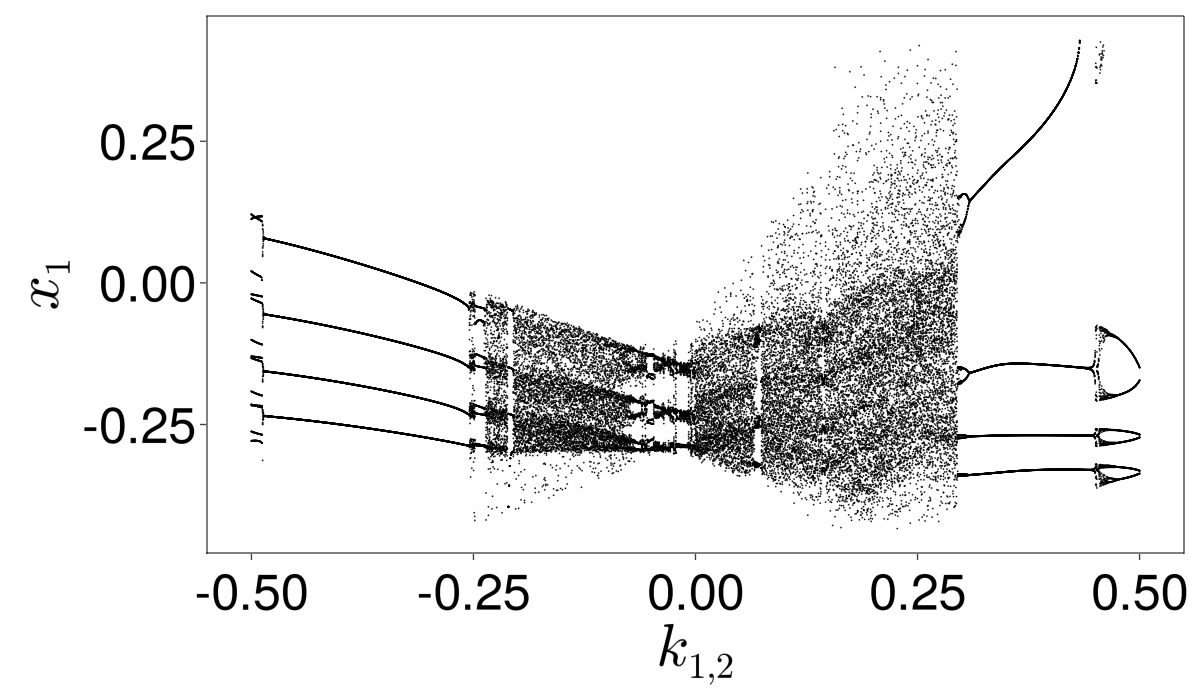

In [72]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig

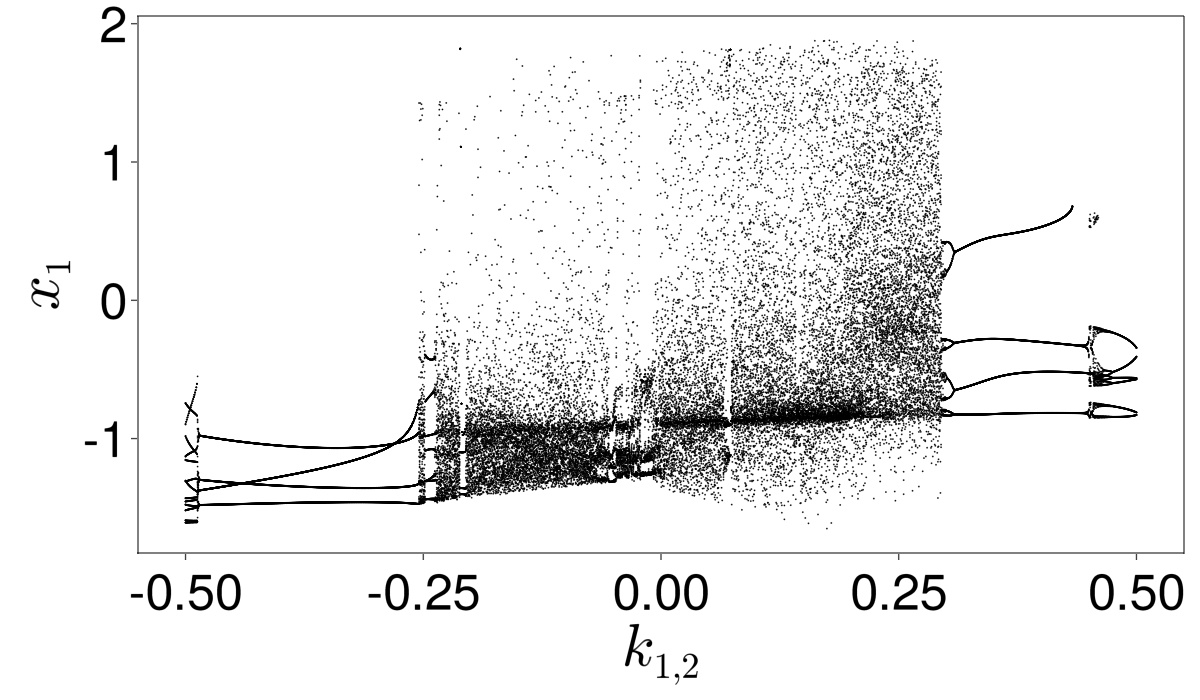

In [73]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output2[j])), output2[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig

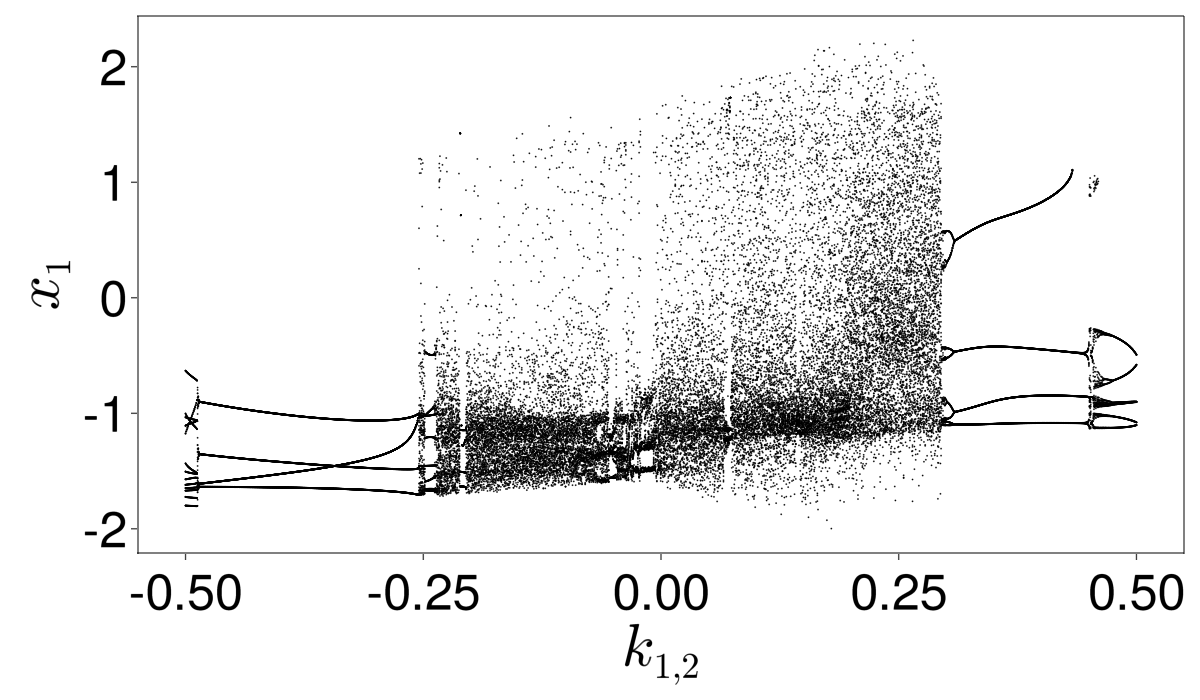

In [77]:
ticks = range(-0.5, 0.5, length = 5)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{1,2}", ylabel = L"x_{1}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false
for (j, p) in enumerate(range_chemical)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 1.5
    )
    
end
fig